## Initial Data Exploration of Parks and Recreation Out of School Time Programs
This data has been uploaded as a GeoJson file, which allows me to easily plot my findings on a map of Philadelphia and compare them to other inequality factors.

 ### Philadelphia Parks and Recreation out-of-school time afterschool programs
Out-of-School Time (OST) is the time that a child or youth spends in after school or summer programming. In Philadelphia, OST programs are provided for young people in grades pre-K through 12. OST are important because they support working parents and caregivers while benefitting a child’s academic, social, and personal development and helps them safe while avoiding high-risk behaviors. https://www.phila.gov/programs/out-of-school-time-ost/
     
 * https://www.opendataphilly.org/dataset/ppr-out-of-school-time-programs

In [2]:
import pandas as pd
import geopandas as gpd

In [3]:
oos_gdf = gpd.read_file('../data/PPROut_of_School_Time_Programs.geojson')

In [4]:
oos_gdf.shape

(78, 7)

There are 78 rows and 7 columns

In [5]:
oos_gdf.plot()

<AxesSubplot:>

In [5]:
oos_gdf.head()

,OBJECTID,NAME_OF_SITE,ADDRESS,ZIP,PHONE,label,geometry
0,1,8th & Diamond Playground,8th & Diamond Streets,19122,215-685-2761,Location,POINT (-75.14713 39.98349)
1,2,48th & Woodland Playground,1414 S. 47th Street,19143,215-685-2692,Location,POINT (-75.21003 39.94259)
2,3,American Legion Playground,Torresdale & Devereaux St.,19135,215-685-8733,Location,POINT (-75.05569 40.01951)
3,4,Amos Playground,1817-59 N. 16th Street,19121,215-685-2708,Location,POINT (-75.16064 39.98107)
4,5,Athletic Recreation Center,1401 N. 26th Street,19121,215-685-2709,Location,POINT (-75.17812 39.97701)


I chose to focus on the "Name of Site" column because I thought it would be clearer to explore and understand than an address of zip-code.

In [6]:
oos_gdf['NAME_OF_SITE'].value_counts()

Guerin Recreation Center      1
Water Tower Rec. Center       1
Glavin Playground             1
Markward Playground           1
Palmer Playground             1
                             ..
Christy Recreation Center     1
American Legion Playground    1
Papa Playground               1
Mill Creek Playground         1
Lee Cultural Center           1
Name: NAME_OF_SITE, Length: 78, dtype: int64

In [7]:
oos_gdf['ZIP'].value_counts()

19121    5
19124    5
19143    4
19135    4
19138    3
19122    3
19145    3
19104    3
19131    3
19125    3
19147    3
19146    3
19120    2
19154    2
19144    2
19126    2
19116    2
19123    2
19142    2
19139    2
19134    2
19140    2
19111    2
19118    1
19132    1
19149    1
19137    1
19136    1
19128    1
19133    1
19114    1
19151    1
19102    1
19130    1
19141    1
19152    1
19150    1
Name: ZIP, dtype: int64

I uploaded a base map of Philadelphia and then charted the Out of School Recreational programs onto the map using the "ADDRESS" column.

In [8]:
base_zip_gdf = gpd.read_file('../data/Zipcodes_Poly.geojson')
base_ward_gdf = gpd.read_file('../data/Political_Divisions.geojson')

<AxesSubplot:>

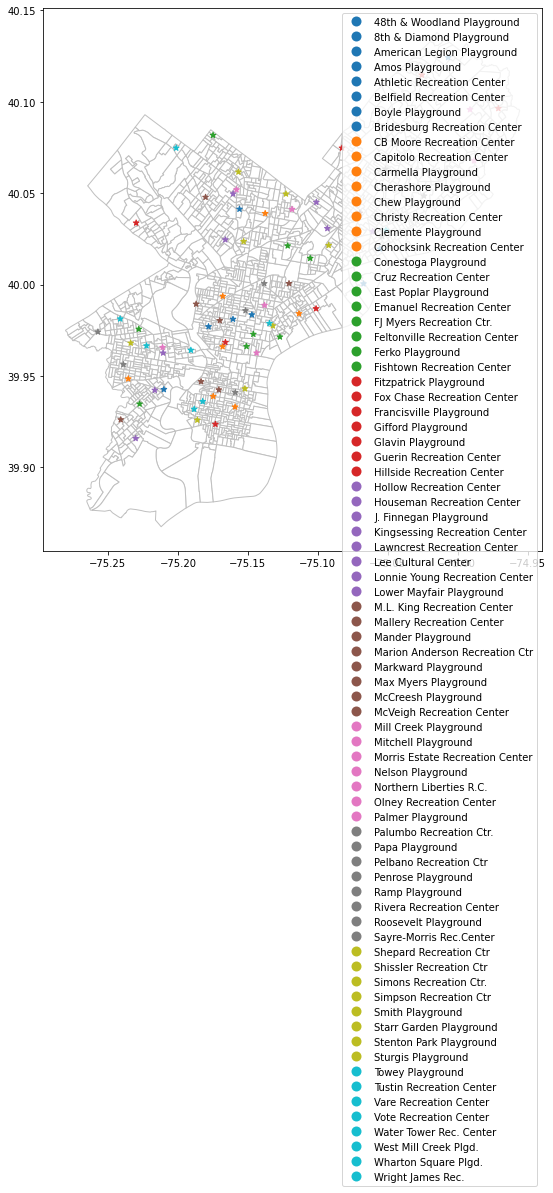

In [9]:
base=base_ward_gdf.plot(color='white', edgecolor='#c0c0c0', figsize=(10,10))
oos_gdf.plot(ax=base, marker='*', column='NAME_OF_SITE', 
                 categorical=False, legend=True)

I am hoping to find a way to plot the locations and have a title on the key without listing all the names or addresses of the locations because I feel like they are not necessary to understanding my data and research. 

In [10]:
#oos_gdf['label']='Location'

In [11]:
#oos_gdf.to_file('../data/PPROut_of_School_Time_Programs.geojson', driver='GeoJSON')

In [12]:
base_zip_gdf = gpd.read_file('../data/Zipcodes_Poly.geojson')
base_ward_gdf = gpd.read_file('../data/Political_Divisions.geojson')

In order to chart these geolocations in a clear way, I created a new column by the name of "location", which could be placed on my accessibility map of Philadelphia

<AxesSubplot:>

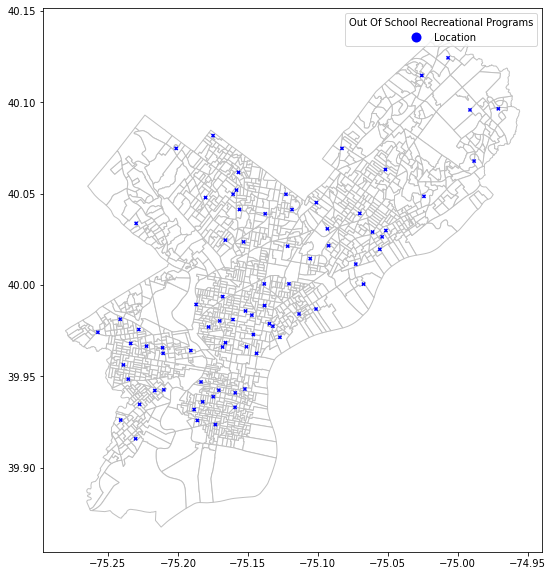

In [13]:
base=base_ward_gdf.plot(color='white', edgecolor='#c0c0c0', figsize=(10,10))
oos_gdf.plot(ax=base, edgecolor='gray', 
            column='label', legend=True,
            cmap='bwr', marker='x', markersize=10,
            legend_kwds={'title': 'Out Of School Recreational Programs', 
                         'loc':'upper right'}
            )

Above I charted all of the Out Of School Recreation programs denoted by a blue "X" to go further than food security but show access to healthy initiatives that encourage movement and socialization for children outside of school.
 >The public exercise equipment, noted by the blue x, is spread out and located nearby parks and 
      recreational centers which allow for the equipment. I noticed that in the NorthEastern area of Philadelphia,
      furthest from the city center there aren't just less public exercise locations but non whatsoever. There is 
      an association with lighter grays (lower accessibility score) and Northwestern Philadelphia.